# Lotka-Volterra: observables and joint score

In [1]:
import numpy as np
import corner
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import corner

In [3]:
x = np.load('../../data/samples/lotkavolterra/x_zoompilot.npy')
#t_xz = np.load('../../data/samples/lotkavolterra/t_xz_pilotfocus.npy')

## Observables

In [4]:
for i in range(9):
    mean = np.mean(x[:,i])
    std = np.std(x[:,i])
    
    print('x component', i, ': mean =', mean, ', stddev =', std)
    
print((np.mean(x,axis=0)))
print((np.std(x,axis=0)))

x component 0 : mean = -0.5736609811832963 , stddev = 0.8521735089356438
x component 1 : mean = -0.15641790264821423 , stddev = 0.3179785692079311
x component 2 : mean = -0.14353277064118225 , stddev = 0.6743331928142445
x component 3 : mean = -0.3915293598407872 , stddev = 0.6997425659073231
x component 4 : mean = 0.429536866580146 , stddev = 0.7324797429551922
x component 5 : mean = 0.5329816169885068 , stddev = 0.7993404366954486
x component 6 : mean = -0.05507886870143822 , stddev = 0.8536427133974981
x component 7 : mean = 0.041107475498777205 , stddev = 0.8219156992597647
x component 8 : mean = 0.4833094690272785 , stddev = 1.333508348146638
[-0.57366098 -0.1564179  -0.14353277 -0.39152936  0.42953687  0.53298162
 -0.05507887  0.04110748  0.48330947]
[0.85217351 0.31797857 0.67433319 0.69974257 0.73247974 0.79934044
 0.85364271 0.8219157  1.33350835]


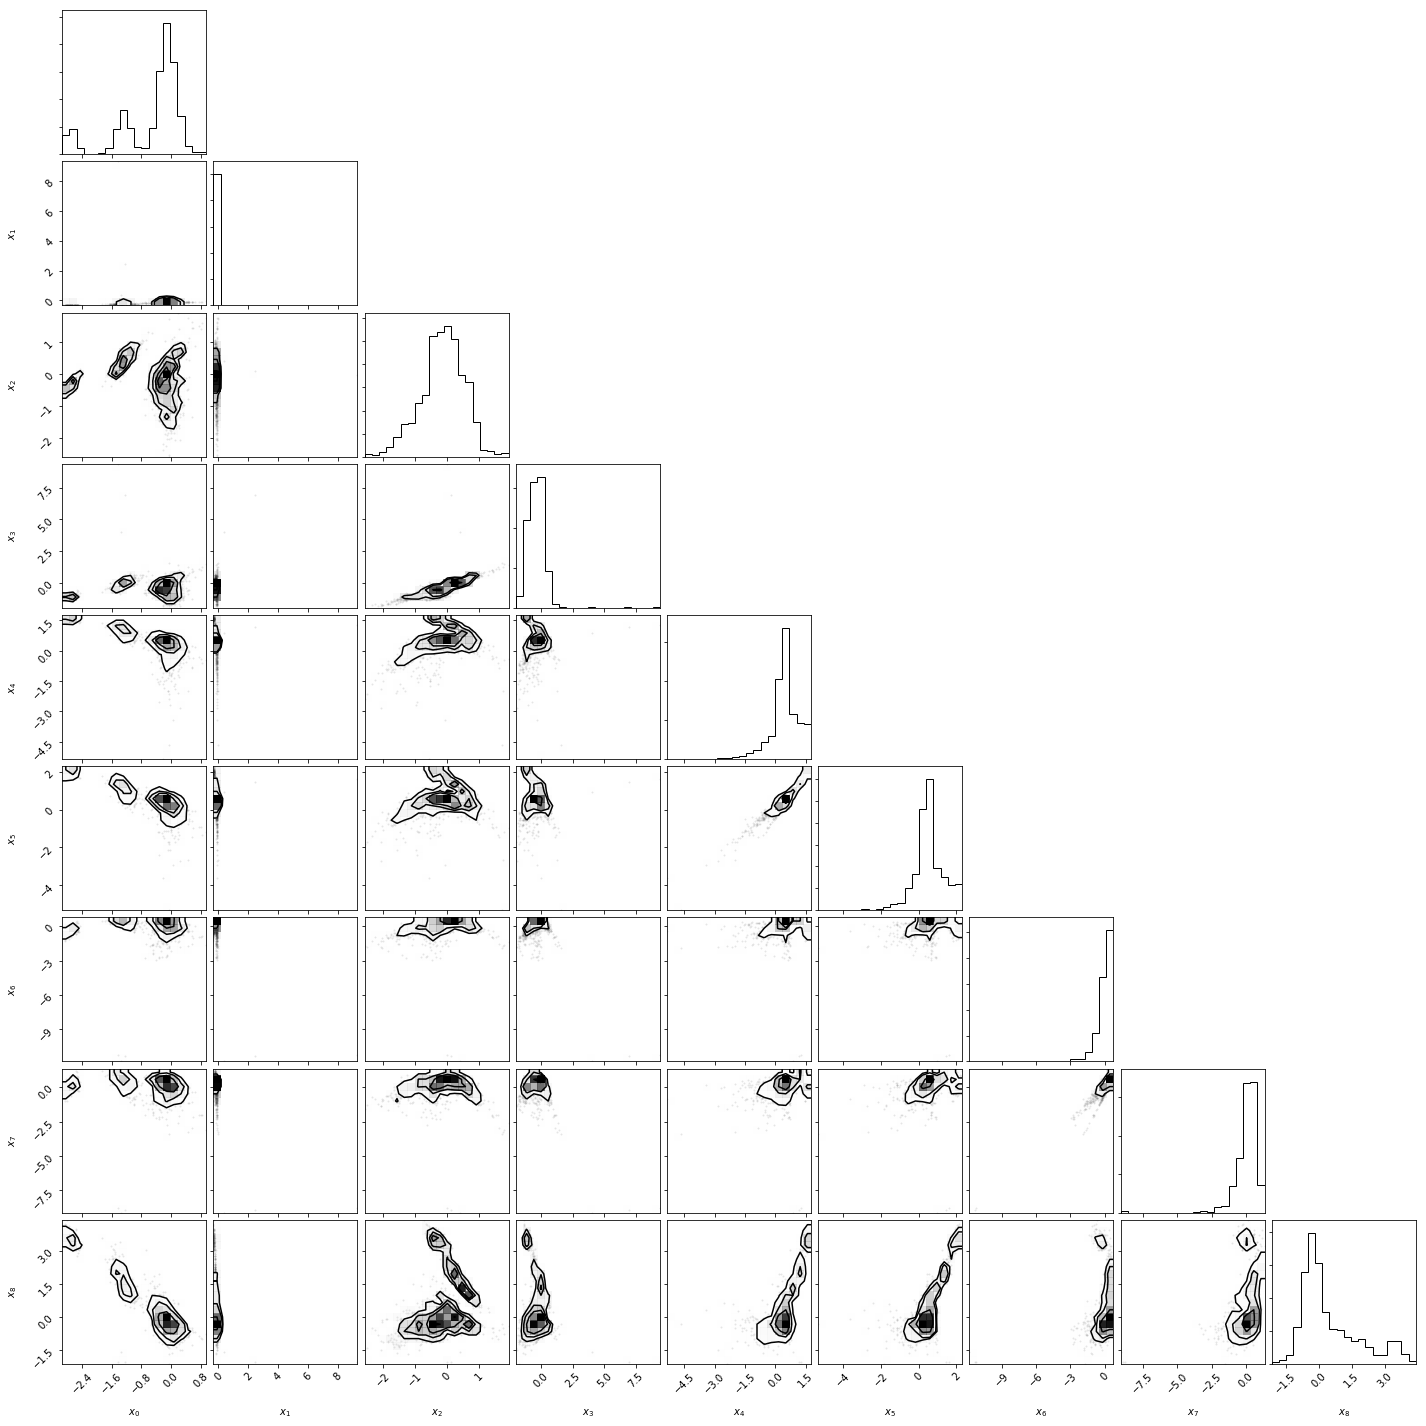

In [5]:
labels=[r'$x_' + str(i) + '$' for i in range(9)]
_ = corner.corner(x,labels=labels)

## Score

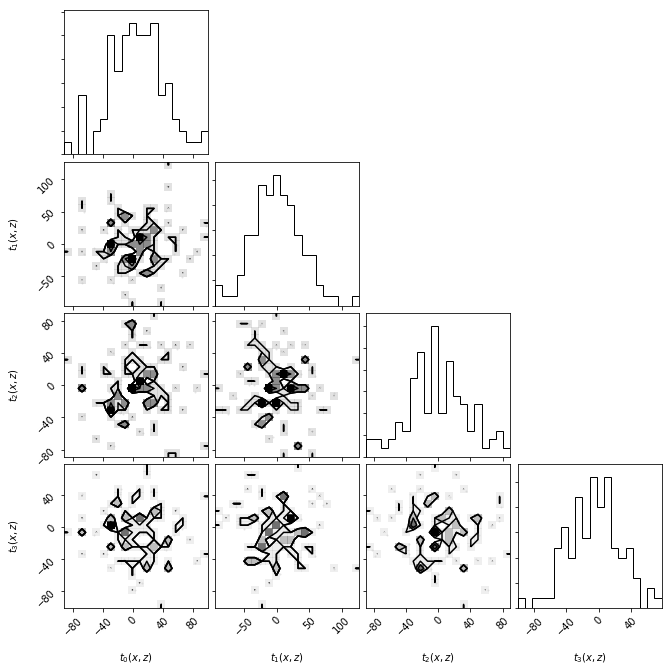

In [35]:
labels=[r'$t_' + str(i) + '(x,z)$' for i in range(4)]
_ = corner.corner(t_xz,labels=labels)

In [36]:
for i in range(4):
    mean = np.mean(t_xz[:,i])
    std = np.std(t_xz[:,i])
    
    print('t(x,z), component', i, ': mean =', mean, ', stddev =', std)

t(x,z), component 0 : mean = 5.1372511376760635 , stddev = 36.42660781277232
t(x,z), component 1 : mean = -0.47220666106179904 , stddev = 37.858813530474826
t(x,z), component 2 : mean = -0.43284824421951795 , stddev = 36.94835310142528
t(x,z), component 3 : mean = -5.722748862323898 , stddev = 32.27388967479573


## Relation between score and observables

4 parameters, 9 observables


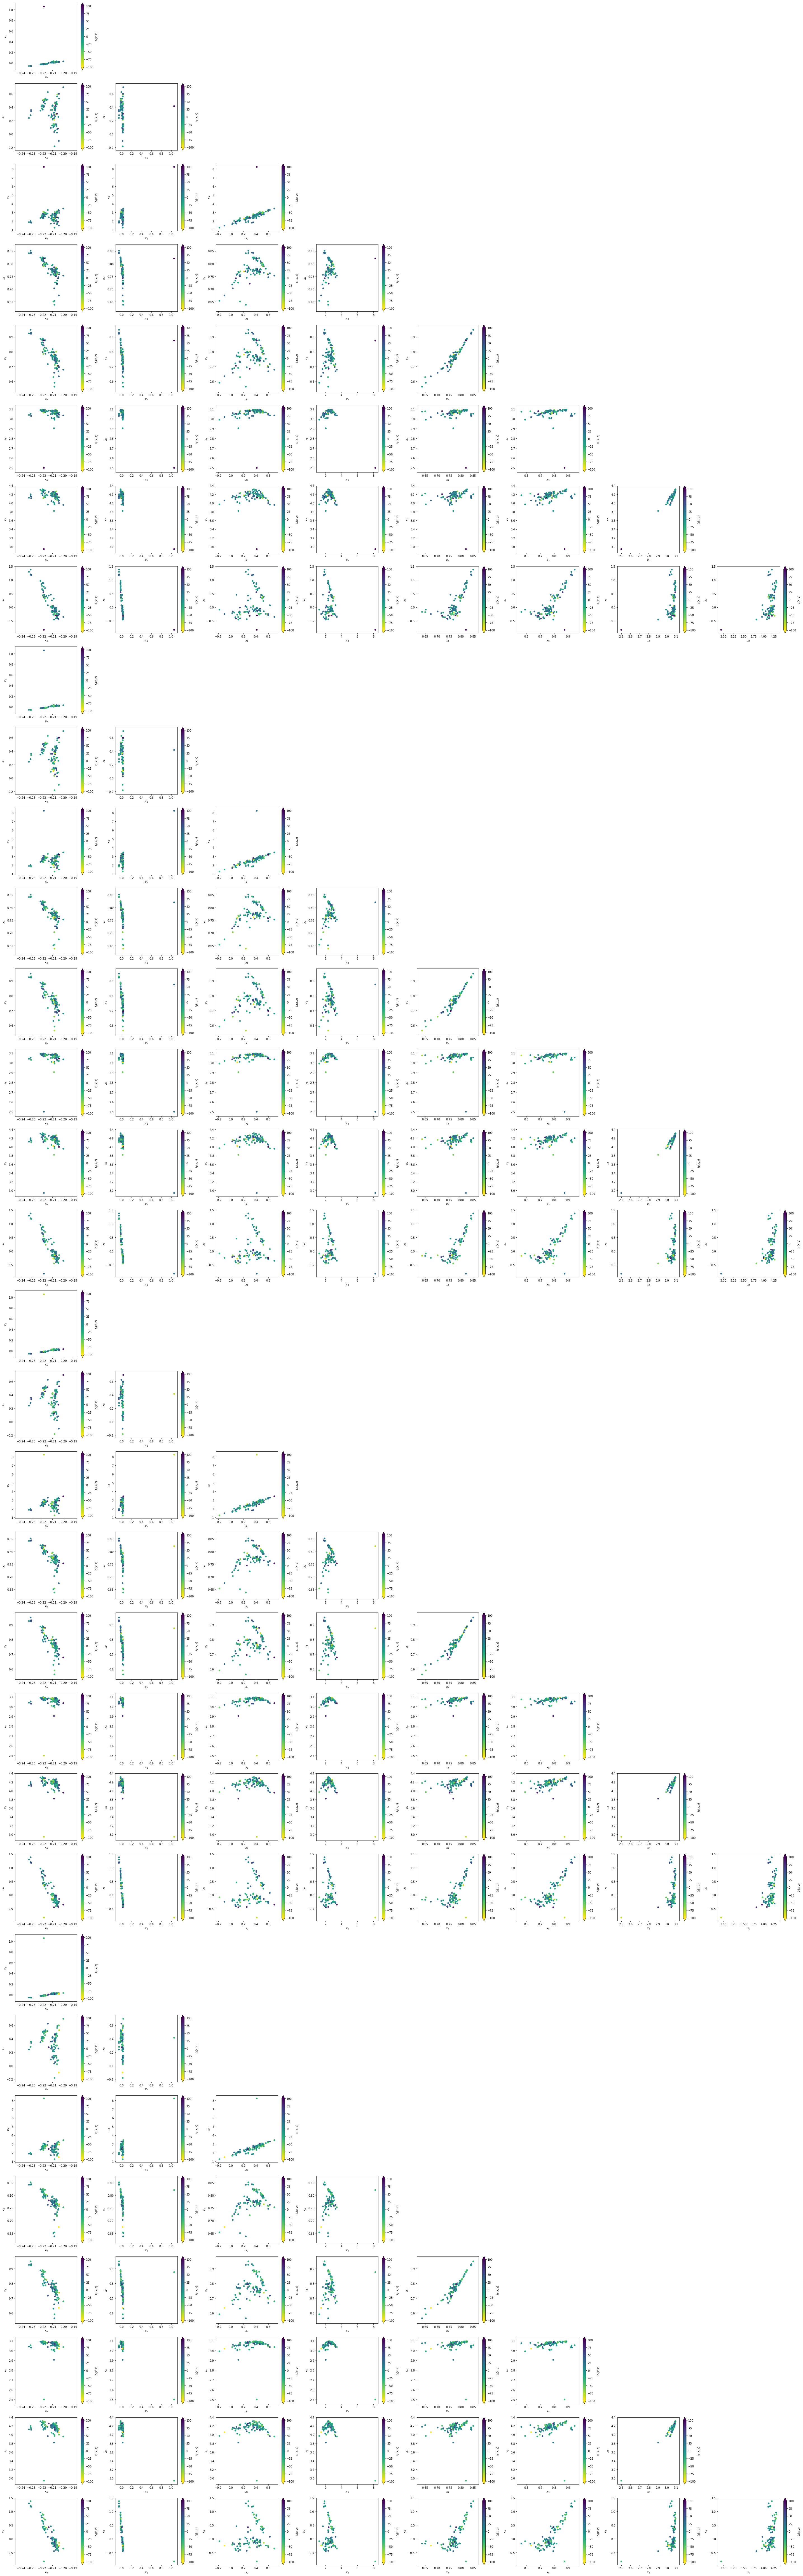

In [38]:
crange=-100.,100.
skip=1

n_parameters = t_xz.shape[1]
n_observables = x.shape[1]

print('{} parameters, {} observables'.format(n_parameters, n_observables))

n_x_panels = (n_observables - 1)
n_y_panels = (n_observables - 1) * n_parameters


fig = plt.figure(figsize=(n_x_panels * 5., n_y_panels * 4.))

for it in range(n_parameters):
    for iy in range(1, n_observables):
        for ix in range(0, iy):
            i_panel = 1 + (it * (n_observables - 1) + (iy - 1)) * n_x_panels + ix
            ax = plt.subplot(n_y_panels, n_x_panels, i_panel)

            sc = plt.scatter(x[::skip, ix], x[::skip, iy], c=t_xz[::skip,it], s=25.,
                             norm=matplotlib.colors.Normalize(vmin=crange[0], vmax=crange[1]), cmap='viridis_r')
            cbar = fig.colorbar(sc, ax=ax, extend='both')

            plt.xlabel(r'$x_' + str(ix) + '$')
            plt.ylabel(r'$x_' + str(iy) + '$')
            cbar.set_label(r'$t_' + str(it) + '(x,z)$')

plt.tight_layout()
plt.show()